# Auto-encoder  (mnist dataset)

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.functional import F
import torch
from sklearn.datasets import load_digits

In [145]:
digits = load_digits()

X = digits.data
y = digits.target

In [146]:
images = lambda i:i.reshape(8,8)

In [147]:
data = torch.tensor(digits.data,dtype=torch.float32)

In [148]:
class Net(nn.Module):
    
    def __init__(self):
        
        super(Net,self).__init__()
        self.enc = self.encoder(8,4)
        self.enc1 = self.encoder(4,2)
        self.dec1 = self.decoder(2,4)
        self.dec = self.decoder(4,8)
    
    def encoder(self,inp,out):
        return nn.Linear(inp,out) # fix the dimentions
    
    def decoder(self,inp,out):
        return nn.Linear(inp,out)
    
    def forward(self,x):
        
        out = F.relu(self.enc(x))
        out = F.relu(self.enc1(out))
        out = F.relu(self.dec1(out))
        out = F.relu(self.dec(out))
        
        return out

In [149]:
model = Net()
print(model)

Net(
  (enc): Linear(in_features=8, out_features=4, bias=True)
  (enc1): Linear(in_features=4, out_features=2, bias=True)
  (dec1): Linear(in_features=2, out_features=4, bias=True)
  (dec): Linear(in_features=4, out_features=8, bias=True)
)


In [150]:
params = [i for i in model.parameters()]

In [151]:
# Sparse regularizer

class SparseLoss(nn.L1Loss):
    def __init__(self):
        
        super(SparseLoss,self).__init__()

        
    def forward(self,inputs,output,model):
        
        
        
        def sparse_loss(autoencoder, images):
            model_children = [i for i in model.children()]
            loss = 0
            values = images
            for i in range(len(model_children)):
                values = F.relu((model_children[i](values)))
                loss += torch.mean(torch.abs(values))
            return loss
        
        mse_loss = F.mse_loss(inputs, output)
        lam = 0.001
        l1_loss = sparse_loss(model,inputs)
        
        final_loss = mse_loss + lam * l1_loss

        return final_loss
        
   

In [152]:
creatrion = SparseLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [153]:
load_data = torch.utils.data.DataLoader(data,batch_size = 32)

In [154]:
print(load_data)

In [155]:
# training

l1_loss = []


for i in range(1000):
       
    image = next(iter(load_data)).reshape(32,8,8)
    
    output = model(image)
    
    loss = creatrion(image,output,model)
    
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if i%100 == 0:
        l1_loss.append(loss.item())
        print(loss.item())


57.802635192871094
57.597652435302734
57.32842254638672
57.007728576660156
56.637413024902344
56.198585510253906
55.66383361816406
54.97966003417969
54.048213958740234
52.74500274658203


In [156]:
%matplotlib inline

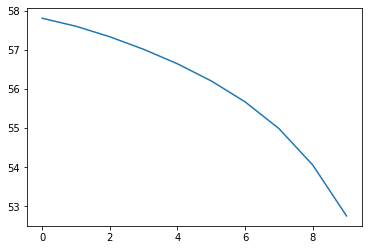

In [157]:
plt.plot(l1_loss)

Text(0.5, 1.0, 'Representation Space')

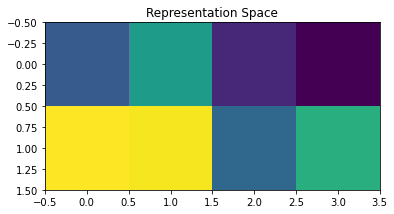

In [158]:
# the representation space output

params = [i for i in model.parameters()]

fig,ax = plt.subplots(1,1)

ax.imshow(params[2].detach().numpy())
ax.set_title("Representation Space")
#print(params)

Text(0.5, 1.0, 'reconstracted image')

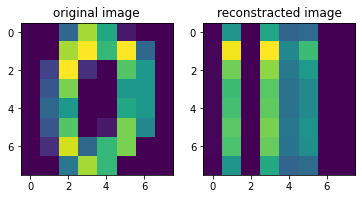

In [159]:
test_image = data[0].reshape(8,8)
output_from_model = model(test_image)

fix,ax = plt.subplots(1,2)

ax[0].imshow(test_image.detach().numpy())
ax[1].imshow(output_from_model.detach().numpy())

ax[0].set_title("original image")
ax[1].set_title("reconstracted image")